In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
import os
import pickle
from sklearn.metrics import accuracy_score

cat_dir="Cat"
dog_dir="Dog"
cell_dir="Cell"

# for cat -->0, dog -->1 and for cell -->2

In [65]:
# NO need to run this cell's code once pickle file is creaded
data=[]
for img in (os.listdir(cat_dir)): ##Loading cat images
    label = 0
    img_path = os.path.join(cat_dir,img)
    images = cv2.imread(img_path,0)
    try:
        images = cv2.resize(images,(50,50),interpolation=cv2.INTER_AREA)
        images = np.array(images).flatten()
        data.append([images,label])## saving img data as number array
    except:
        continue


for img in (os.listdir(dog_dir)): ##Loading dog images
    label = 1
    img_path = os.path.join(dog_dir,img)
    images = cv2.imread(img_path,0)
    try:
        images = cv2.resize(images,(50,50),interpolation=cv2.INTER_AREA)
        images = np.array(images).flatten()
        data.append([images,label])## saving img data as number array
    except:
        continue


for img in (os.listdir(cell_dir)): ##Loading cell images
    label = 2
    img_path = os.path.join(cell_dir,img)
    images = cv2.imread(img_path,0)
    try:
        images = cv2.resize(images,(50,50),interpolation=cv2.INTER_AREA)
        images = np.array(images).flatten()
        data.append([images,label])## saving img data as number array
    except:
        continue
    
random.shuffle(data)

##Saving data in file so do not need to run this cell every time
pickle_in = open("data_cat_vs_dog_vs_cell.pickle",'wb')
pickle.dump(data,pickle_in)
pickle_in.close()

In [2]:

pickle_in = open("data_cat_vs_dog_vs_cell.pickle",'rb')
data = pickle.load(pickle_in)
pickle_in.close()
data = pd.DataFrame(data, columns = ["Fetures","Lable"])


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
x_train,x_test,y_train,y_test = train_test_split(data["Fetures"],data["Lable"],test_size=0.10)

In [5]:
model = SVC(C=1,kernel='poly',gamma='auto')
model.fit(x_train.values.tolist(),y_train)

SVC(C=1, gamma='auto', kernel='poly')

#Predict Accuracy

In [6]:
prediction = model.predict(x_test.values.tolist())
accuracy_score(y_test,pd.Series(prediction))

0.6749585406301825

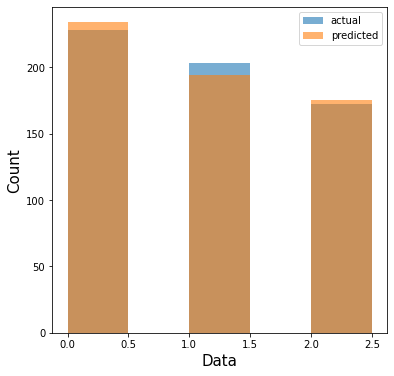

In [7]:
plt.figure(figsize=(6,6))
plt.hist(y_test,bins=[0,0.5,1,1.5,2,2.5],alpha=0.6,label="actual")
plt.hist(pd.Series(prediction),bins=[0,0.5,1,1.5,2,2.5],alpha=0.6,label="predicted")
plt.xlabel("Data", size=15)
plt.ylabel("Count", size=15)
plt.legend(loc='upper right')

Enter image path with name
pic.jpeg
Readed image AxesImage(54,36;334.8x217.44)
Image after reshape (50,50) AxesImage(54,36;334.8x217.44)
It's Cell


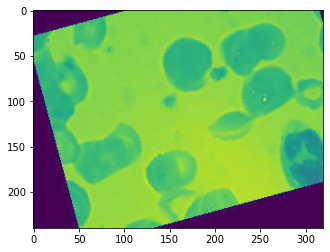

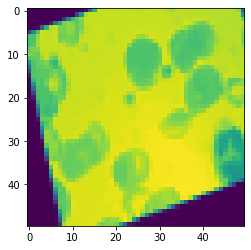

In [125]:
print("Enter image path with name")
while(True):
    imgpath = input()
    if(type(imgpath)==type("string")):
        break
    print("Enter string with picture type e.g(.png)")
image = cv2.imread(imgpath,0)
plt.figure()
print("Readed image",plt.imshow(image))
image = cv2.resize(image,(50,50),interpolation=cv2.INTER_AREA)
plt.figure()
print("Image after reshape (50,50)",plt.imshow(image))
image = np.array(image).flatten()
image = [image]
predict = model.predict(image)
if(predict==0):
    print("It's Cat")
elif(predict==1):
    print("It's Dog")
else:
    print("It's Cell")